## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [29]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

In [18]:
clf_org=DecisionTreeClassifier(random_state=2)
clf_org.fit(x_train, y_train)
y_pred=clf_org.predict(x_test)

In [19]:
acc_org = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc_org)

Acuuracy:  0.9736842105263158


In [21]:
clf=DecisionTreeClassifier(random_state=2, max_depth=8)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [22]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


-------------------

In [17]:
boston=datasets.load_boston()
X_train, X_test, Y_train, Y_test=train_test_split(boston.data, boston.target, random_state=11)

In [25]:
dreg=DecisionTreeRegressor(random_state=20)
dreg.fit(X_train, Y_train)
Y_pred=dreg.predict(X_test)
Y_pred_train=dreg.predict(X_train)

RMSE for validation: 5.031248807893437
RMSE for train: 0.0
Mean score for cross validation: 0.6636201351012219


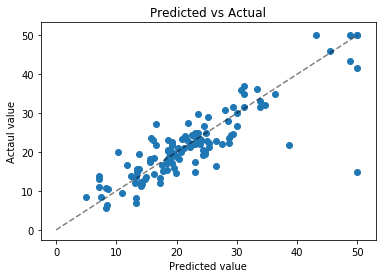

In [30]:
print("RMSE for validation:",metrics.mean_squared_error(Y_test, Y_pred)**0.5)
print("RMSE for train:", metrics.mean_squared_error(Y_train, Y_pred_train)**0.5)
print("Mean score for cross validation:",cross_val_score(dreg, X_train, Y_train, cv=5).mean())
plt.plot([0,np.max(Y_test)],[0,np.max(Y_test)],linestyle='--', color='black', alpha=0.5)
plt.scatter(Y_pred, Y_test)
plt.xlabel("Predicted value")
plt.ylabel("Actaul value")
plt.title("Predicted vs Actual")
plt.show()